<a href="https://colab.research.google.com/github/DanielDialektico/Machine-Learning/blob/main/Redes%20Neuronales/RNA_Clasificaci%C3%B3n_de_Prendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

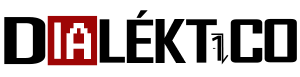

**ALGORITMO DE APRENDIZAJE SUPERVISADO** ü§ñ

# 1. Introducci√≥n
En esta pr√°ctica podr√°s observar y ejecutar la procreaci√≥n y entrenamiento de un algoritmo de **aprendizaje supervisado** desde la carga del **conjunto de datos**, hasta la evaluaci√≥n del **modelo** resultante. 

El fin de esto es que presencies c√≥mo se concretan los **objetivos** que persigue el aprendizaje supervisado en cada diferente paso de su metodolog√≠a, operando desde un espacio de programaci√≥n en **Python**. 

Como se mencion√≥ en la **[exploraci√≥n](https://dialektico.com/aprendizaje-supervisado/)**, este algoritmo utilizar√° **redes neuronales artificiales** para aprender a realizar una tarea de clasificaci√≥n. 



# 2. Objetivo

Como ya se ha establecido, el objetivo planteado es el de entrenar un modelo para otorgarle la capacidad de **clasificar** im√°genes de ropa de acuerdo a **10 clases** diferentes, las cuales se pueden consultar en la siguiente tabla: <br>
<br>
<center>
<table>
  <tr>
    <th>Nombre de la prenda (salida)</th>
  </tr>
  <tr>
    <td>Playera/Blusa</td>
  </tr>
  <tr>
    <td>Pantal√≥n</td>
  </tr>
    <tr>
    <td>Su√©ter</td>
  </tr>
    <tr>
    <td>Vestido</td>
  </tr>
    <tr>
    <td>Abrigo</td>
  </tr>
    <tr>
    <td>Sandalia</td>
  </tr>
    <tr>
    <td>Camisa</td>
  </tr>
    <tr>
    <td>Zapato/Tenis</td>
  </tr>
    <tr>
    <td>Bolsa</td>
  </tr>
    <tr>
    <td>Bot√≠n</td>
  </tr>
</table></center><br>
<br>

Para este c√≥digo utilizaremos parte de las librer√≠as antes vistas para **preprocesamiento** de datos, y sumaremos la librer√≠a [Tensorflow](https://www.tensorflow.org/), la cual fue desarrollada por **Google**, y ser√° clave para el cumplimiento de nuestro objetivo, ya que sus funciones est√°n expresamente enfocadas en el dise√±o de modelos de **machine learning**. 

# 3. Conjunto de datos

Las im√°genes que utilizaremos para entrenar el modelo provienen del popular  conjunto de datos **[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)**, el cual es de acceso p√∫blico y contiene m√°s de **70,000** im√°genes de ropa de baja resoluci√≥n de las categor√≠as antes mencionadas, en escala de grises, de tama√±o 28x28. 

En la siguiente figura se puede observar una muestra de este conjunto de datos:
<center><table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
</table></center>

<center><b>Fig. 1</b> Peque√±a muestra del conjunto de datos fashion MNIST</a> (Zalando, MIT License).</center>

# 4. Carga de datos y preprocesamiento

Para invocar al conjunto de datos a nuestro espacio de trabajo utilizaremos la API **[Keras](https://www.tensorflow.org/guide/keras?hl=es-419)** de la librer√≠a **tensorflow**, la cual nos permitir√° almacenar los datos en un arreglo, en este caso, una **tupla**.

Ejecuta el siguiente bloque para cargar las librer√≠as y los datos: 

In [1]:
#Se importan las librer√≠as.
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Se define el tipo de formato de las gr√°ficas.
plt.style.use('seaborn-v0_8-whitegrid')

#Se ignoran las alertas.
warnings.filterwarnings('ignore')

#Se carga el conjunto de datos.
dataset = keras.datasets.fashion_mnist.load_data()

Como sabemos por nuestro **[entrenamiento en preprocesamiento de datos](https://dialektico.com/introduccion-preprocesamiento/)**, toda **entrada** de un modelo de **machine learning** debe ser una estructura matem√°tica legible para la m√°quina, por lo que debemos asegurarnos de que nuestro conjunto de datos est√© acondicionado de esta manera. 

Afortunadamente, este conjunto ya provee la informaci√≥n en **formas matriciales**, es decir, cada imagen se expresa como una matriz, donde todo n√∫mero contenido en esta representa un valor para cada **pixel**, en un rango de entre 0 y 255. A estar la imagen en escala de grises, el valor 0 corresponde al color **negro**, mientras que el 255 al **blanco**, y los valores intermedios a diferentes tonos de **grises**.

La **figura 2** muestra una ejemplificaci√≥n de esto:



<center><img src="https://dialektico.com/wp-content/uploads/2023/03/Colab1.jpg"
         alt="Fashion MNIST sprite"  width="300"></center>

<center><b>Fig. 2</b> Relaci√≥n entre los valores de una representaci√≥n matricial de una imagen en escala de grises y sus correspondientes variaciones de color en escala de grises. Rescatado de <a href="https://www.researchgate.net/publication/325569674_Analysis_of_Emotions_From_Body_Postures_Based_on_Digital_Imaging">(Bradley & Lang, 1994b)</a></center>

Esto es una conversi√≥n t√≠pica en **visi√≥n computacional** (estudio del procesamiento de im√°genes), y la exploraremos m√°s a detalle cuando tengamos nuestros primeros encuentros con **redes neuronales convolucionales**.

Por el momento, solo nos limitaremos a observar una de las matrices asociadas a una imagen del conjunto de datos:

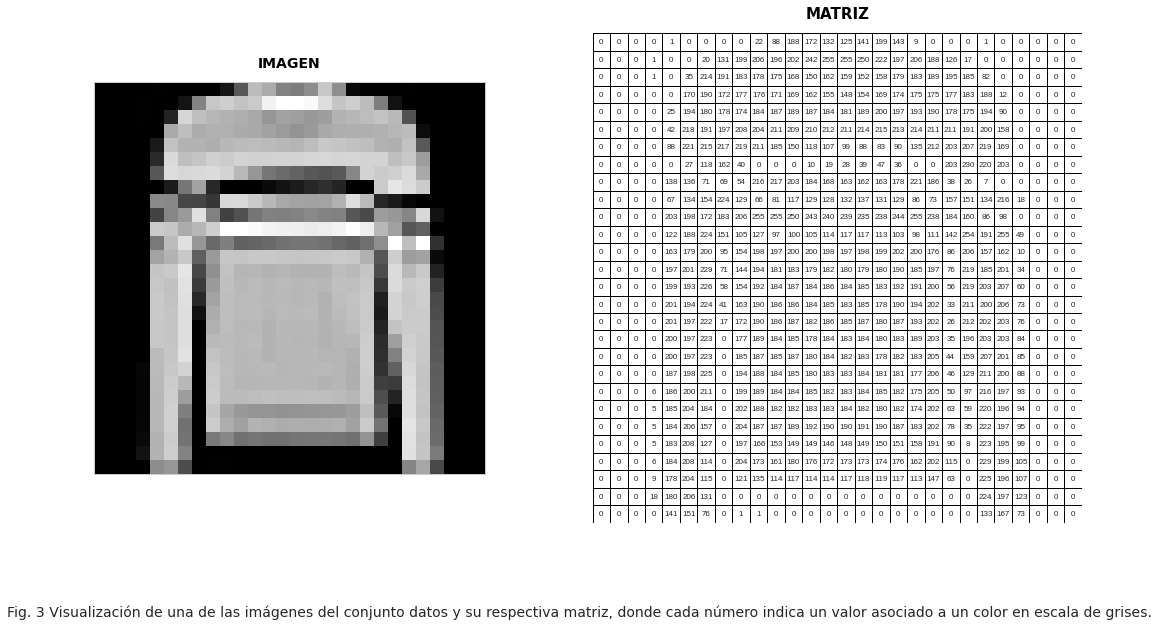

In [2]:
#Se selecciona una imagen del conjunto de datos.
matrix = dataset[0][0][5]

#Se imprime una imagen del conjunto de datos y su respectiva matriz.
fig, axs = plt.subplots(1, 2, figsize=(18, 9), gridspec_kw={'width_ratios': [1.5, 2]})

#Imagen.
axs[0].imshow(matrix, cmap='gray')
axs[0].set_title("IMAGEN", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 14}, pad = 15)
axs[0].set_yticks([])
axs[0].set_xticks([])

#Matriz.
axs[1].set_facecolor('white')
sns.heatmap(matrix, fmt='d', annot=True, square=True, cmap='gray_r', vmin=0, vmax=0,
            linewidths=0.5, linecolor='k', cbar=False, ax=axs[1], annot_kws={'fontsize':8}) 

axs[1].set_title("MATRIZ", fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': 15}, pad = 15)
axs[1].set_xticklabels([])
axs[1].set_yticklabels([])

plt.suptitle("Fig. 3 Visualizaci√≥n de una de las im√°genes del conjunto datos y su respectiva matriz, donde cada n√∫mero indica un valor asociado a un color en escala de grises.", 
             fontproperties = {'family': 'DejaVu Sans', 'size': 14}, y=-0.001)
plt.show()

En la **figura 3** se despliega la comparaci√≥n entre una imagen del conjunto de datos (a la izquierda), y su matriz con los valores de cada pixel (lado derecho).

Dado que no hay mucho **preprocesamiento** que aplicar a estas im√°genes, solo se dividir√° el conjunto de datos en los conjuntos de **entrenamiento** (train) y **prueba** (test), se asignar√°n nombres a las **categor√≠as**, y se **normalizar√°n** los valores de todas las matrices dividi√©ndolos entre su valor m√°ximo: **255**.

En el siguiente bloque se efectuar√°n las **divisiones** del conjunto de datos (cuyas longitudes ya fueron definidas por quienes lo crearon), la asignaci√≥n de los nombres de las **etiquetas**, la **normalizaci√≥n** de los datos, y se imprimir√° el n√∫mero de ejemplos de im√°genes de cada subconjunto:



In [3]:
#Se definen las entradas y salidas de conjuntos de entrenamiento y prueba respectivamente.
(train_inputs, train_outputs), (test_inputs, test_outputs) = dataset

#Se normalizan los datos.
train_images = train_inputs / 255.0
test_images = test_inputs / 255.0

#Se definen los nombres de cada categor√≠a
class_names = ['Playera/Blusa', 'Pantal√≥n', 'Su√©ter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Zapato/tenis', 'Mochila', 'Bot√≠n']

#Se imprimen las longitudes de los conjuntos:
print('N√∫mero de ejemplos de entrenamiento en el conjunto de entrenamiento: ' + str(len(train_inputs)))
print('N√∫mero de ejemplos de entrenamiento en el conjunto de prueba: ' + str(len(test_inputs)))

N√∫mero de ejemplos de entrenamiento en el conjunto de entrenamiento: 60000
N√∫mero de ejemplos de entrenamiento en el conjunto de prueba: 10000


Podemos observar que se tiene una distribuci√≥n de im√°genes de alrededor de 85% del total para el conjunto de **entrenamiento**, y 15% para el de **prueba**.  

# 5. Entrenamiento del modelo

Ahora que hemos cargado los datos, podemos crear y entrenar el **modelo** para que aprenda a **clasificar** prendas. Los detalles sobre c√≥mo sucede esto los aprenderemos en pr√≥ximas expediciones, hoy solo lo veremos en acci√≥n. 

El siguiente bloque **entrenar√°** al modelo de **aprendizaje autom√°tico** durante **8 √©pocas** (8 iteraciones), es decir, se procesar√° la informaci√≥n 10 veces con el fin de extraer **patrones** para la concreci√≥n de nuestro objetivo. Al ejecutar el c√≥digo, podr√°s ver c√≥mo se imprimen los resultados para cada √©poca (**Epoch**). El valor de **accuracy** al final de cada l√≠nea es el valor de la **precisi√≥n** de clasificaci√≥n del modelo.

**Nota**: tardar√° poco m√°s de un minuto en ejecutarse.

In [4]:
#Se define el modelo de redes neuronales artificiales y se compila.
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_inputs, train_outputs, epochs=8, verbose = 1)

test_loss, test_acc = model.evaluate(test_inputs,  test_outputs, verbose=0)

#Se imprime la precisi√≥n de predicci√≥n del modelo.
print('\nPrecisi√≥n de predicci√≥n final:', test_acc)

Epoch 1/8
1875/1875 [==============================] - 19s 9ms/step - loss: 1.9763 - accuracy: 0.7280
Epoch 2/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6963 - accuracy: 0.7687
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6614 - accuracy: 0.7828
Epoch 4/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6241 - accuracy: 0.7961
Epoch 5/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5498 - accuracy: 0.8145
Epoch 6/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5033 - accuracy: 0.8257
Epoch 7/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4575 - accuracy: 0.8387
Epoch 8/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4360 - accuracy: 0.8462

Precisi√≥n de predicci√≥n final: 0.8452000021934509


Al final observar√°s una **precisi√≥n** de predicci√≥n por encima del **80%**. La intenci√≥n de este modelo fue entrenarlo con una **arquitectura** que no generara una precisi√≥n cercana al 100% para poder presenciar un modelo que a√∫n puede ser **optimizado**.  En este caso, podr√≠amos hacer algunas adecuaciones, como utilizar **capas convolucionales**, entre otros ajustes a los **hiperpar√°metros**, pero de esto hablaremos luego. 

# 6. Clasificando prendas con el modelo entrenado


El modelo est√° entrenado y listo para realizar predicciones. Al ejecutar la siguiente casilla de c√≥digo le dar√°s una **imagen**, este la **procesar√°** y nos dir√° a qu√© clase "**piensa**" que pertenece. 

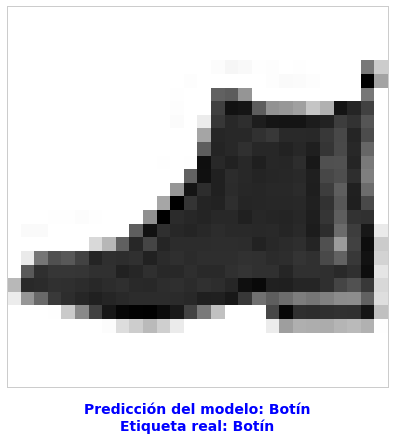

In [5]:
#Se realizan las predicciones con nuevas im√°genes.
predictions = model.predict(test_inputs, verbose = 0)

#Se define una funci√≥n para el despliegue de la imagen testeada, junto a su probabilidad de categorizaci√≥n estimada, y su etiqueta verdadera.
def plot_image(image_indx, predictions_arr, true_output, image, font_size):
  predictions_arr, true_output, image, font_size = predictions_arr, true_output[image_indx], image[image_indx], font_size
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(image, cmap=plt.cm.binary)

  predicted_output = np.argmax(predictions_arr)
  if predicted_output == true_output:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel('Predicci√≥n del modelo: ' + str(class_names[predicted_output]) + '\n'
              + 'Etiqueta real: ' + str(class_names[true_output]),
              color=color, fontdict = {'family': 'DejaVu Sans', 'color':  'black', 'weight': 'bold', 'size': font_size}, labelpad=15)

#Se selecciona la imagen n√∫mero 160 del conjunto de datos, se entrega al modelo, y se grafican los resultados.
image_indx = 165
plt.figure(figsize=(7,7))
plt.plot
plot_image(image_indx, predictions[image_indx], test_outputs, test_inputs, 14)

El resultado es una imagen con dos l√≠neas de texto adjuntas:


*   La primera indica a qu√© **categor√≠a** ha asignado el modelo a la imagen de entrada.
*   La segunda muestra la **etiqueta** real de la imagen, extra√≠da del conjunto de datos de prueba.


Nos podemos percatar de que en la primera l√≠nea de texto el modelo ha etiquetado como **bot√≠n** a la imagen que le hemos proporcionado, y que esta coincide con la etiqueta **real** mostrada debajo, lo cual nos indica que el modelo **acert√≥** en su **clasificaci√≥n**.

**Nota**: si el color de las letras es **azul**, quiere decir que la predicci√≥n fue exitosa, en caso contrario, se mostrar√°n te√±idas de **rojo**.

Probemos ahora con una imagen diferente:

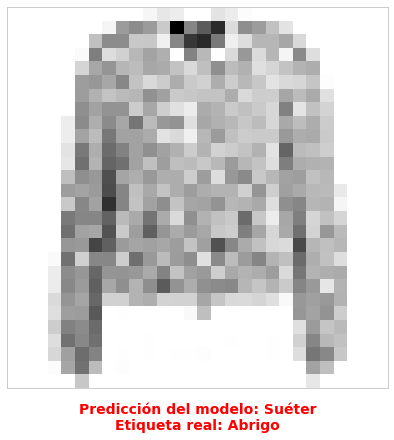

In [6]:
#Se etiqueta, eval√∫a y grafica una imagen nueva.
image_indx = 51
plt.figure(figsize=(7,7))
plt.plot
plot_image(image_indx, predictions[image_indx], test_outputs, test_inputs, 14)

En este caso, dependiendo de c√≥mo se entren√≥ tu red, puede que esta haga una predicci√≥n err√≥nea, etiquetando al abrigo como otra prenda diferente.

Finalmente, para una visualizaci√≥n m√°s amplia del rendimiento del modelo, en el siguiente fragmento lo utilizaremos para clasificar un grupo de **15 im√°genes diferentes**. (Recuerda que aquellas acompa√±adas por textos color **rojo** representan im√°genes mal etiquetadas).

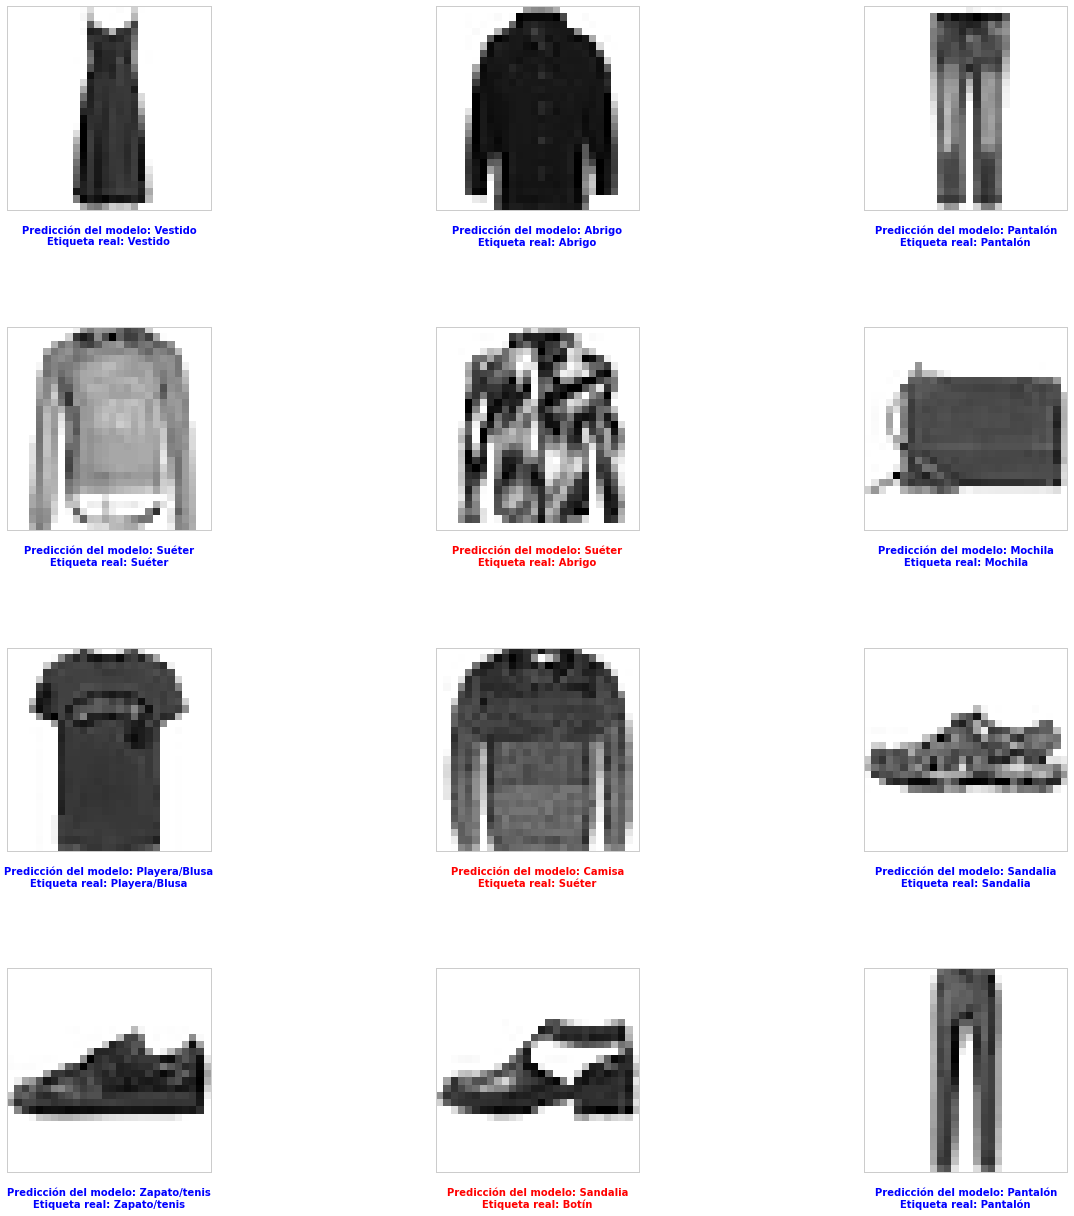

In [7]:
#Se eval√∫an y grafican 15 im√°genes del conjunto de datos.
num_rows = 4
num_cols = 3
j=0

plt.figure(figsize=(18, 18))
for i in range(13,25):
  plt.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, predictions[i], test_outputs, test_inputs, 10)
  j = j + 1
plt.tight_layout()
plt.show()

Notar√°s que la mayor√≠a de las im√°genes fueron clasificadas de forma exitosa, pero con algunos errores de predicci√≥n.


## Define tus propias pruebas

Por √∫ltimo, tienes la libertad de utilizar cualquier imagen que desees del conjunto de datos de **prueba** y hacer que el modelo la clasifique. Lo √∫nico que tienes que hacer es modificar la **primera l√≠nea** del siguiente fragmento de c√≥digo, agregando un n√∫mero entre el **0** y el **9999**. 

Una vez que hayas colocado el n√∫mero, ejecuta el programa para observar el resultado.

In [ ]:
image_indx = #Escribe aqu√≠ un n√∫mero entre el 0 y el 9999

plt.figure(figsize=(7,7))
plt.plot
plot_image(image_indx, predictions[image_indx], test_outputs, test_inputs, 14)

Con esto concluye nuestro primer acercamiento a los **algoritmos de aprendizaje supervisado**, en este caso, una **red neuronal artificial**, tambi√©n conocida como **perceptr√≥n o perceptr√≥n multicapa**. 

Recuerda que esto es solo ilustrativo, en las pr√≥ximas exploraciones comprenderemos c√≥mo operan y se elaboran todo tipo de **modelos** de **aprendizaje de m√°quinas**.

‚ñ∂ [Regresar a la lecci√≥n](https://dialektico.com/aprendizaje-supervisado/) üßô

In [ ]:
# MIT License
#
# Copyright (c) 2023 Daniel Garc√≠a
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.